            year    BEV_sales  PHEV_sales  BEV_demand  PHEV_demand  \
mean    2015.000   624218.182  311134.545    4618.182      670.000   
median  2015.000   330000.000  220000.000    2200.000      420.000   
mode    2010.000     7400.000     380.000       0.000        0.000   
std        3.317   698899.423  312988.210    6181.394      813.744   
min     2010.000     7400.000     380.000       0.000        0.000   
max     2020.000  2000000.000  980000.000   18000.000     2300.000   

        total_motor_cars_production  motor_mt  bev_kt  phev_kt  
mean                   6.566625e+07   302.091  19.519   10.592  
median                 6.714920e+07   309.000   7.972    5.678  
mode                   5.583446e+07   257.000   0.186    0.004  
std                    5.763888e+06    26.455  24.953   12.305  
min                    5.583446e+07   257.000   0.186    0.004  
max                    7.345653e+07   338.000  75.348   37.128  


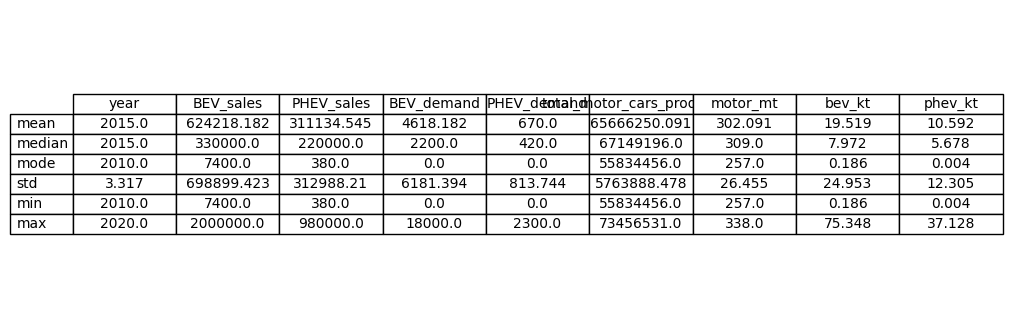

In [1]:
import pandas as pd
import numpy as np

# Load your dataset
data = pd.read_csv('ts.csv')

# Select only numeric columns to avoid issues with strings/categoricals
numeric_data = data.select_dtypes(include=[np.number])

# Check if numeric_data is empty
if numeric_data.empty:
    print("No numeric columns found in the dataset.")
else:
    # Build the custom summary safely
    custom_summary = pd.DataFrame({
        'mean': numeric_data.mean(),
        'median': numeric_data.median(),
        'mode': numeric_data.mode().iloc[0],
        'std': numeric_data.std(),
        'min': numeric_data.min(),
        'max': numeric_data.max()
    }).T.round(3)  # Transpose to make rows as stats and round to 3 decimals

    print(custom_summary)


import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 4))
ax.axis('off')

table = ax.table(cellText=custom_summary.values,
                 colLabels=custom_summary.columns,
                 rowLabels=custom_summary.index,
                 loc='center',
                 cellLoc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# Save as image
plt.savefig('describe_table_ts.png', bbox_inches='tight', dpi=300)
plt.show()

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets (replace with actual file paths)
ts_df = pd.read_csv('ts.csv')

# Univariate Analysis: Density plot for NOx Emissions
plt.figure(figsize=(8, 4))  # Compact for PPT
sns.kdeplot(data=ts_df, x='bev_kt', label='battery', color='blue')
sns.kdeplot(data=ts_df, x='BEV_sales', label='sales', color='red')
plt.title('Univariate Analysis: BEVs Distribution', fontsize=10)
plt.xlabel('BEVs')
plt.ylabel('Density')
plt.legend()
plt.savefig('BEV.png', dpi=300, bbox_inches='tight')  # Save for PPT
plt.close()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets (replace with actual file paths)
ts_df = pd.read_csv('ts.csv')

# Univariate Analysis: Density plot for NOx Emissions
plt.figure(figsize=(8, 4))  # Compact for PPT
sns.kdeplot(data=ts_df, x='motor_mt', label='motor', color='blue')
sns.kdeplot(data=ts_df, x='total_motor_cars_production', label='sales', color='red')
plt.title('Univariate Analysis: Motors Distribution', fontsize=10)
plt.xlabel('Motors')
plt.ylabel('Density')
plt.legend()
plt.savefig('Motors.png', dpi=300, bbox_inches='tight')  # Save for PPT
plt.close()

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load dataset (replace with actual file path)
ts_df = pd.read_csv('ts.csv')

plt.figure(figsize=(8, 4))
# Add 1 to handle zeros, then log-transform
sns.kdeplot(data=np.log1p(ts_df['bev_kt']), label='CO₂ Production (thousands)', color='blue')
sns.kdeplot(data=np.log1p(ts_df['BEV_sales']), label='BEV Sales (units)', color='red')
plt.title('Univariate Analysis: BEVs Distribution (Log-Transformed)', fontsize=10)
plt.xlabel('Log(Value + 1)')
plt.ylabel('Density')
plt.legend()
plt.savefig('bev_density_log.png', dpi=300, bbox_inches='tight')
plt.close()

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load dataset (replace with actual file path)
ts_df = pd.read_csv('ts.csv')

plt.figure(figsize=(8, 4))
# Add 1 to handle zeros, then log-transform
sns.kdeplot(data=np.log1p(ts_df['motor_mt']), label='CO₂ production (thousands)', color='blue')
sns.kdeplot(data=np.log1p(ts_df['total_motor_cars_production']), label='Motor Sales (units)', color='red')
plt.title('Univariate Analysis: Motors Distribution (Log-Transformed)', fontsize=10)
plt.xlabel('Log(Value + 1)')
plt.ylabel('Density')
plt.legend()
plt.savefig('motors_density_log.png', dpi=300, bbox_inches='tight')
plt.close()